In [1]:
import pandas as pd
import os

data = pd.read_csv('./supermarket_sales - Sheet1.csv')

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
data.shape

(1000, 17)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract additional features from the 'Date' column
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month

# Extract the hour from the 'Time' column
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,4,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,6,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,6,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,4,2,10


In [6]:
# Check for missing values and duplicates
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
DayOfWeek                  0
Month                      0
Hour                       0
dtype: int64

In [7]:
data.drop_duplicates()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,4,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,6,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,6,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,4,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1,1,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,5,3,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,5,2,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,4,2,15


In [8]:
data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

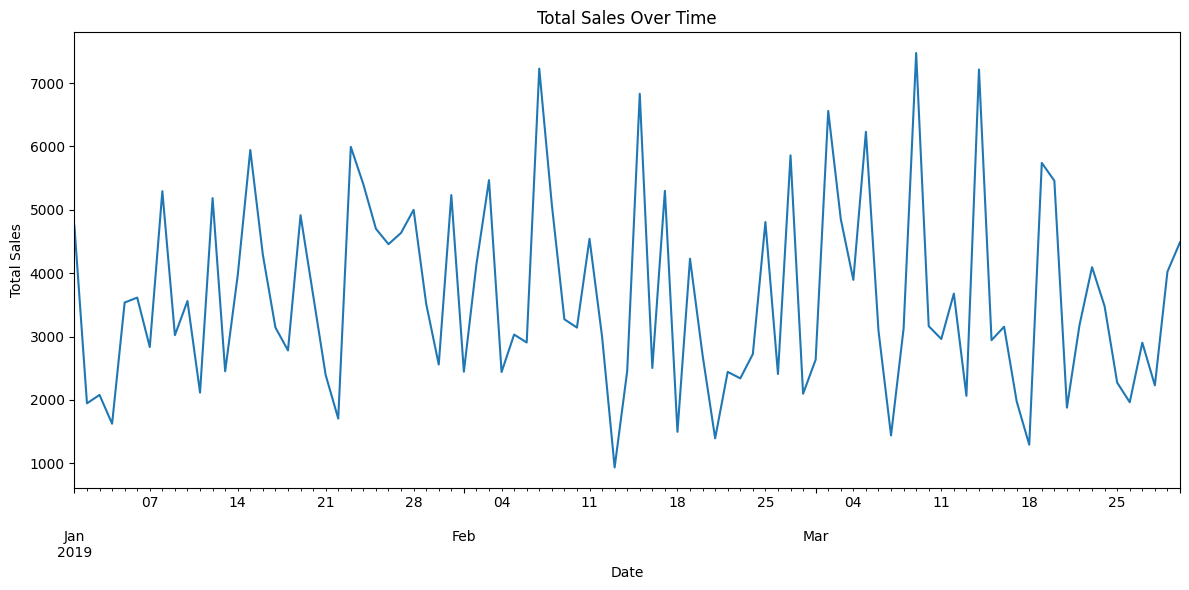

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('../SalesBoost/Website/')

# Plot total sales over time
plt.figure(figsize=(12, 6))
data.groupby('Date')['Total'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('static/images/plot_1.png')
plt.show()
plt.close()

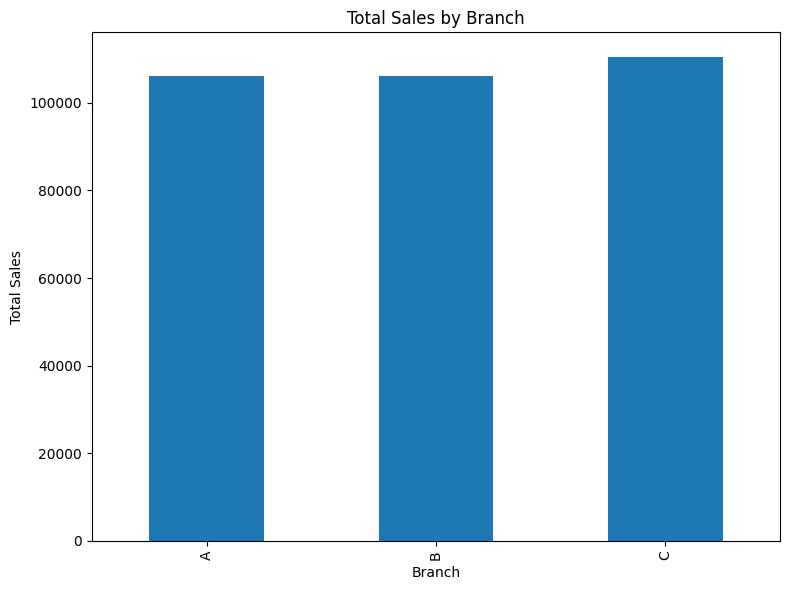

In [10]:
# Sales by Branch
plt.figure(figsize=(8, 6))
data.groupby('Branch')['Total'].sum().plot(kind='bar')
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('static/images/plot_2.png')
plt.show()
plt.close()

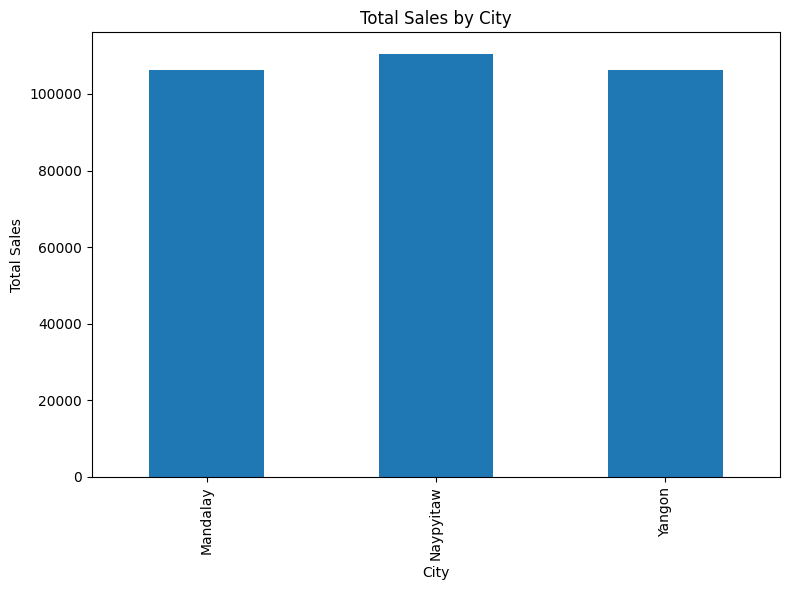

In [11]:
# Sales by City
plt.figure(figsize=(8, 6))
data.groupby('City')['Total'].sum().plot(kind='bar')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('static/images/plot_3.png')
plt.show()
plt.close()

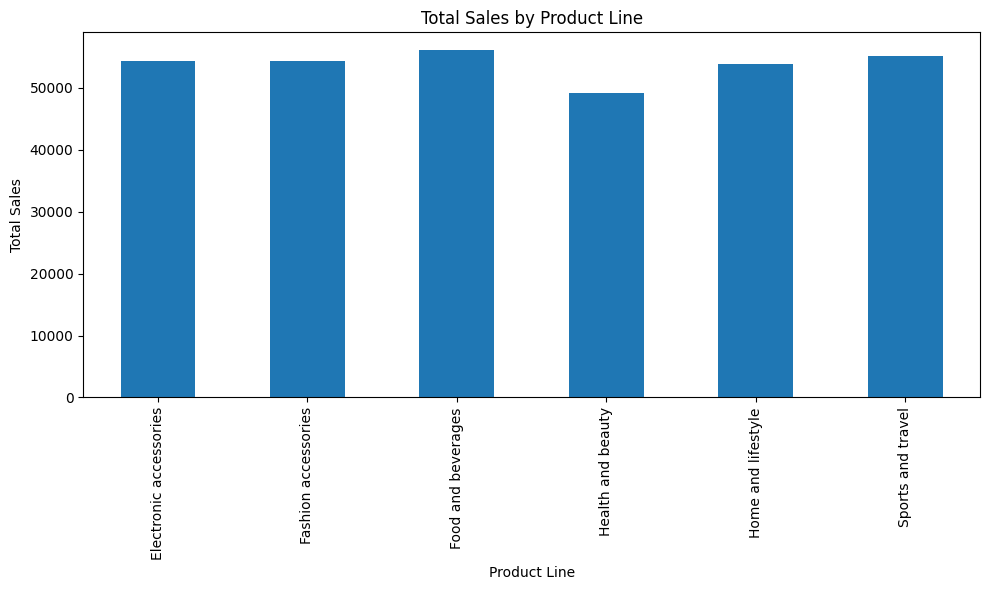

In [12]:
# Sales by Product Line

plt.figure(figsize=(10, 6))
data.groupby('Product line')['Total'].sum().plot(kind='bar')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('static/images/plot_4.png')
plt.show()
plt.close()

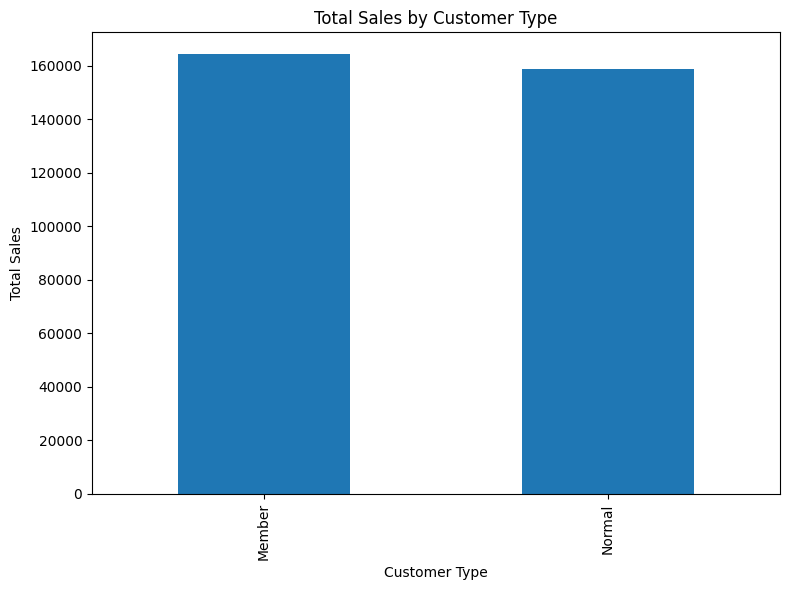

In [13]:
plt.figure(figsize=(8, 6))
data.groupby('Customer type')['Total'].sum().plot(kind='bar')
plt.title('Total Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('static/images/plot_5.png')
plt.show()
plt.close()

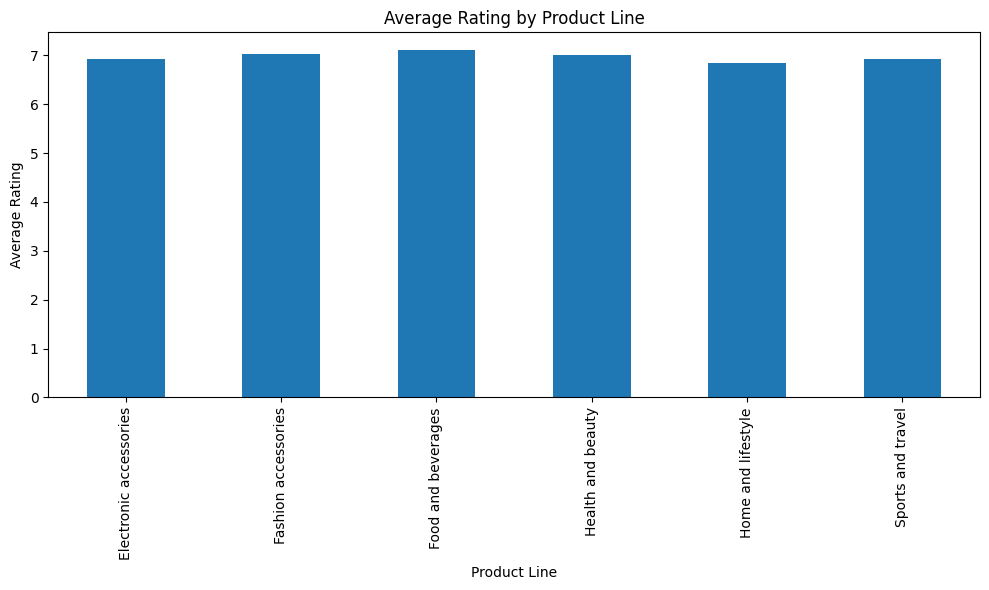

In [14]:
plt.figure(figsize=(10, 6))
data.groupby('Product line')['Rating'].mean().plot(kind='bar')
plt.title('Average Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.savefig('static/images/plot_6.png')
plt.show()
plt.close()

In [15]:
import joblib
from sklearn.preprocessing import LabelEncoder
os.chdir('./static/')

encoders = {}
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

# Save the encoders to disk
joblib.dump(encoders, 'encoders.pkl')

['encoders.pkl']

In [16]:
"""# Correlation Analysis
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()"""

"# Correlation Analysis\ncorrelation_matrix = data.corr()\n\n# Plot the correlation matrix\nplt.figure(figsize=(16, 15))\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')\nplt.title('Correlation Matrix')\nplt.show()"

 **Sales Forecasting**

In [17]:
# Select features for the Random Forest model
features = ['DayOfWeek', 'Month', 'Hour', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Payment']
X = data[features]
y = data['Total']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

os.chdir('../models/')
joblib.dump(rf_model, 'random_forest_model.pkl')
rf_forecast = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_rmse = np.sqrt(np.mean((rf_forecast - y_test) ** 2))
print(f'Random Forest RMSE: {rf_rmse}')

Random Forest RMSE: 9.086543048168584


In [20]:
# Visualization of the forecast


In [21]:
# Simulate a real-time data point
real_time_data = pd.DataFrame({
    'DayOfWeek': [2],       # Example day of the week (Tuesday)
    'Month': [7],           # Example month (July)
    'Hour': [15],           # Example hour (3 PM)
    'Branch': [1],          # Example branch
    'City': [2],            # Example city
    'Customer type': [1],   # Example customer type
    'Gender': [0],          # Example gender
    'Product line': [3],    # Example product line
    'Unit price': [10.5],   # Example unit price
    'Quantity': [5],        # Example quantity
    'Payment': [2]          # Example payment method
})

# Predict the sales for the new data point
predicted_sales = rf_model.predict(real_time_data)
print(f'Predicted Sales for real-time data point: {predicted_sales[0]}')

Predicted Sales for real-time data point: 58.07172000000007


Linear Regression RMSE: 2.990603308646188


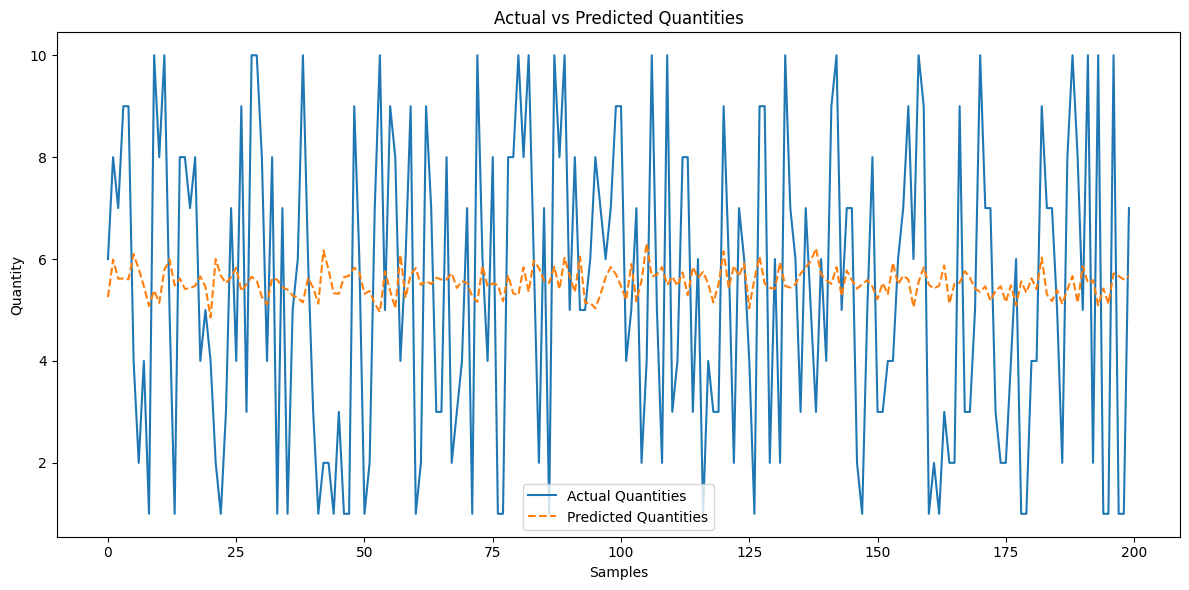

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
os.chdir('../')

# Select features and target
features = ['DayOfWeek', 'Month', 'Hour', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Payment']
X = data[features]
y = data['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Linear Regression RMSE: {rmse}')

# Visualization: Actual vs Predicted Quantities
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Quantities')
plt.plot(y_pred, label='Predicted Quantities', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted Quantities')
plt.legend()
plt.tight_layout()
plt.savefig('static/images/plot_7.png')
plt.show()
plt.close()

Linear Regression RMSE: 3.9726918284944133


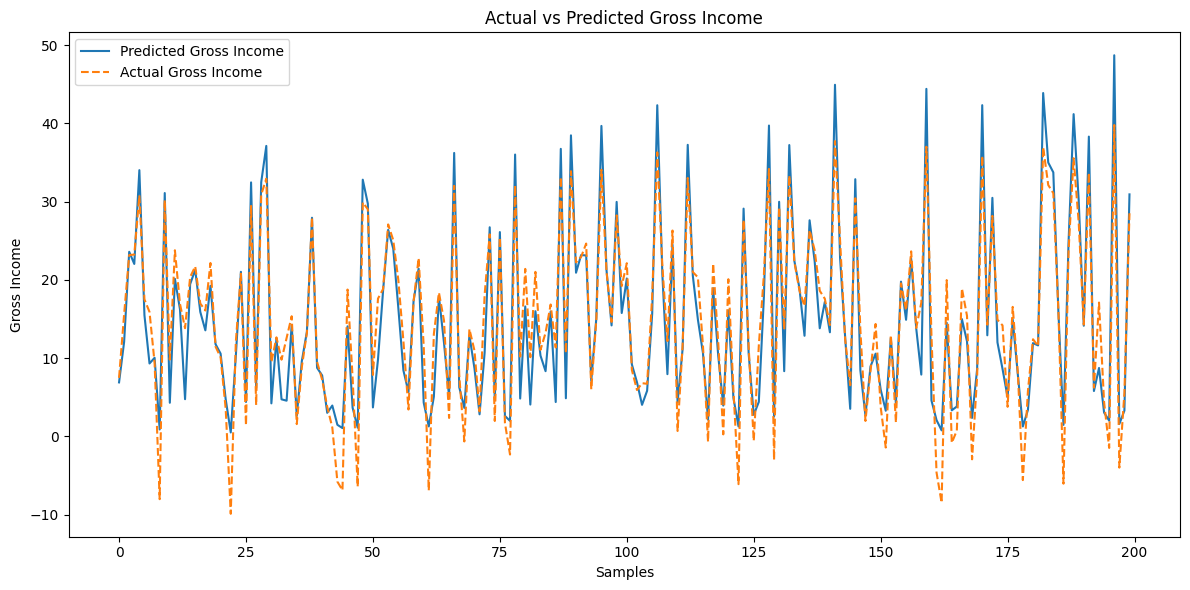

In [23]:
# Select features and target
features = ['DayOfWeek', 'Month', 'Hour', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Payment']
X = data[features]
y = data['gross income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Linear Regression RMSE: {rmse}')

# Visualization: Actual vs Predicted Gross Income
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Predicted Gross Income')
plt.plot(y_pred, label='Actual Gross Income', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Gross Income')
plt.title('Actual vs Predicted Gross Income')
plt.legend()
plt.tight_layout()
plt.savefig('static/images/plot_8.png')
plt.show()
plt.close()

Decision Tree RMSE: 2.5744416870459506


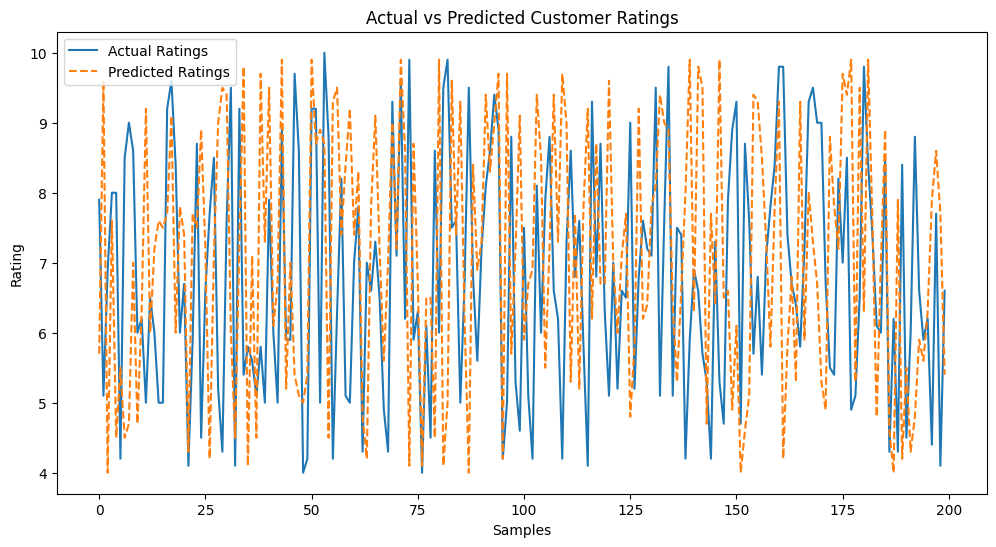

In [24]:
from sklearn.tree import DecisionTreeRegressor

# Select features and target
features = ['DayOfWeek', 'Month', 'Hour', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Payment']
X = data[features]
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Train a Decision Tree Regressor model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Make predictions
y_pred = tree_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Decision Tree RMSE: {rmse}')

# Visualization: Actual vs Predicted Ratings
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Ratings')
plt.plot(y_pred, label='Predicted Ratings', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Customer Ratings')
plt.legend()
plt.show()